In [1]:
import numpy as np
import cantera as ct
import pandas as pd 
import os
import sys
import time
import itertools
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import cumtrapz
import glob
import seaborn as sns

In [2]:
ER = 1.0 
P = 1.0 
T = 1500.0

data_d0 = pd.read_csv(f"/work/kotlarcm/WORK/Automated_Reduced/0D/Detailed/0Dreactor_ER{ER}_T{T}_P{P}.csv")
data_r0 = pd.read_csv(f"/work/kotlarcm/WORK/Automated_Reduced/0D/Reduced/0Dreactor_ER{ER}_T{T}_P{P}.csv")

data_d = pd.read_csv("/work/kotlarcm/WORK/Automated_Reduced/0D/Processing_Detailed.csv")
data_r = pd.read_csv("/work/kotlarcm/WORK/Automated_Reduced/0D/Processing_Reduced.csv")
loc_data_d = data_d[(data_d["Phi_Init"]==ER) & (data_d["P_Init"]==P*101325.0) & (data_d["T_Init"]==T) ]
loc_data_r = data_r[(data_r["Phi_Init"]==ER) & (data_r["P_Init"]==P*101325.0) & (data_r["T_Init"]==T) ]

species = [col for col in data_r0.columns if col.startswith("Y_")]

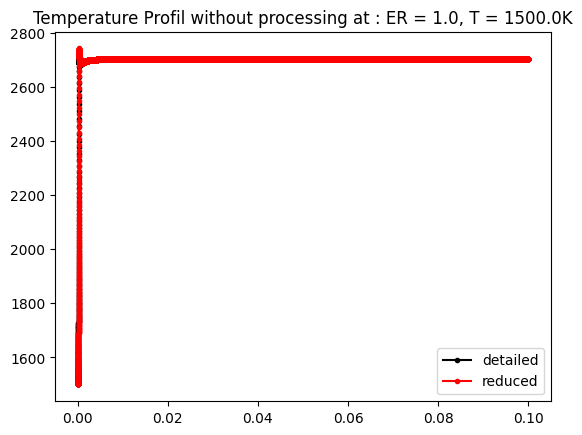

In [3]:
plt.plot(data_d0["t"],data_d0["T"],'k.-', label='detailed')
plt.plot(data_r0["t"],data_r0["T"],'r.-', label='reduced')
plt.legend()
plt.title(f"Temperature Profil without processing at : ER = {ER}, T = {T}K")
plt.savefig("temperature.png")

/tmp/ipykernel_2205283/2490965488.py:23: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0, 1, 0.95])


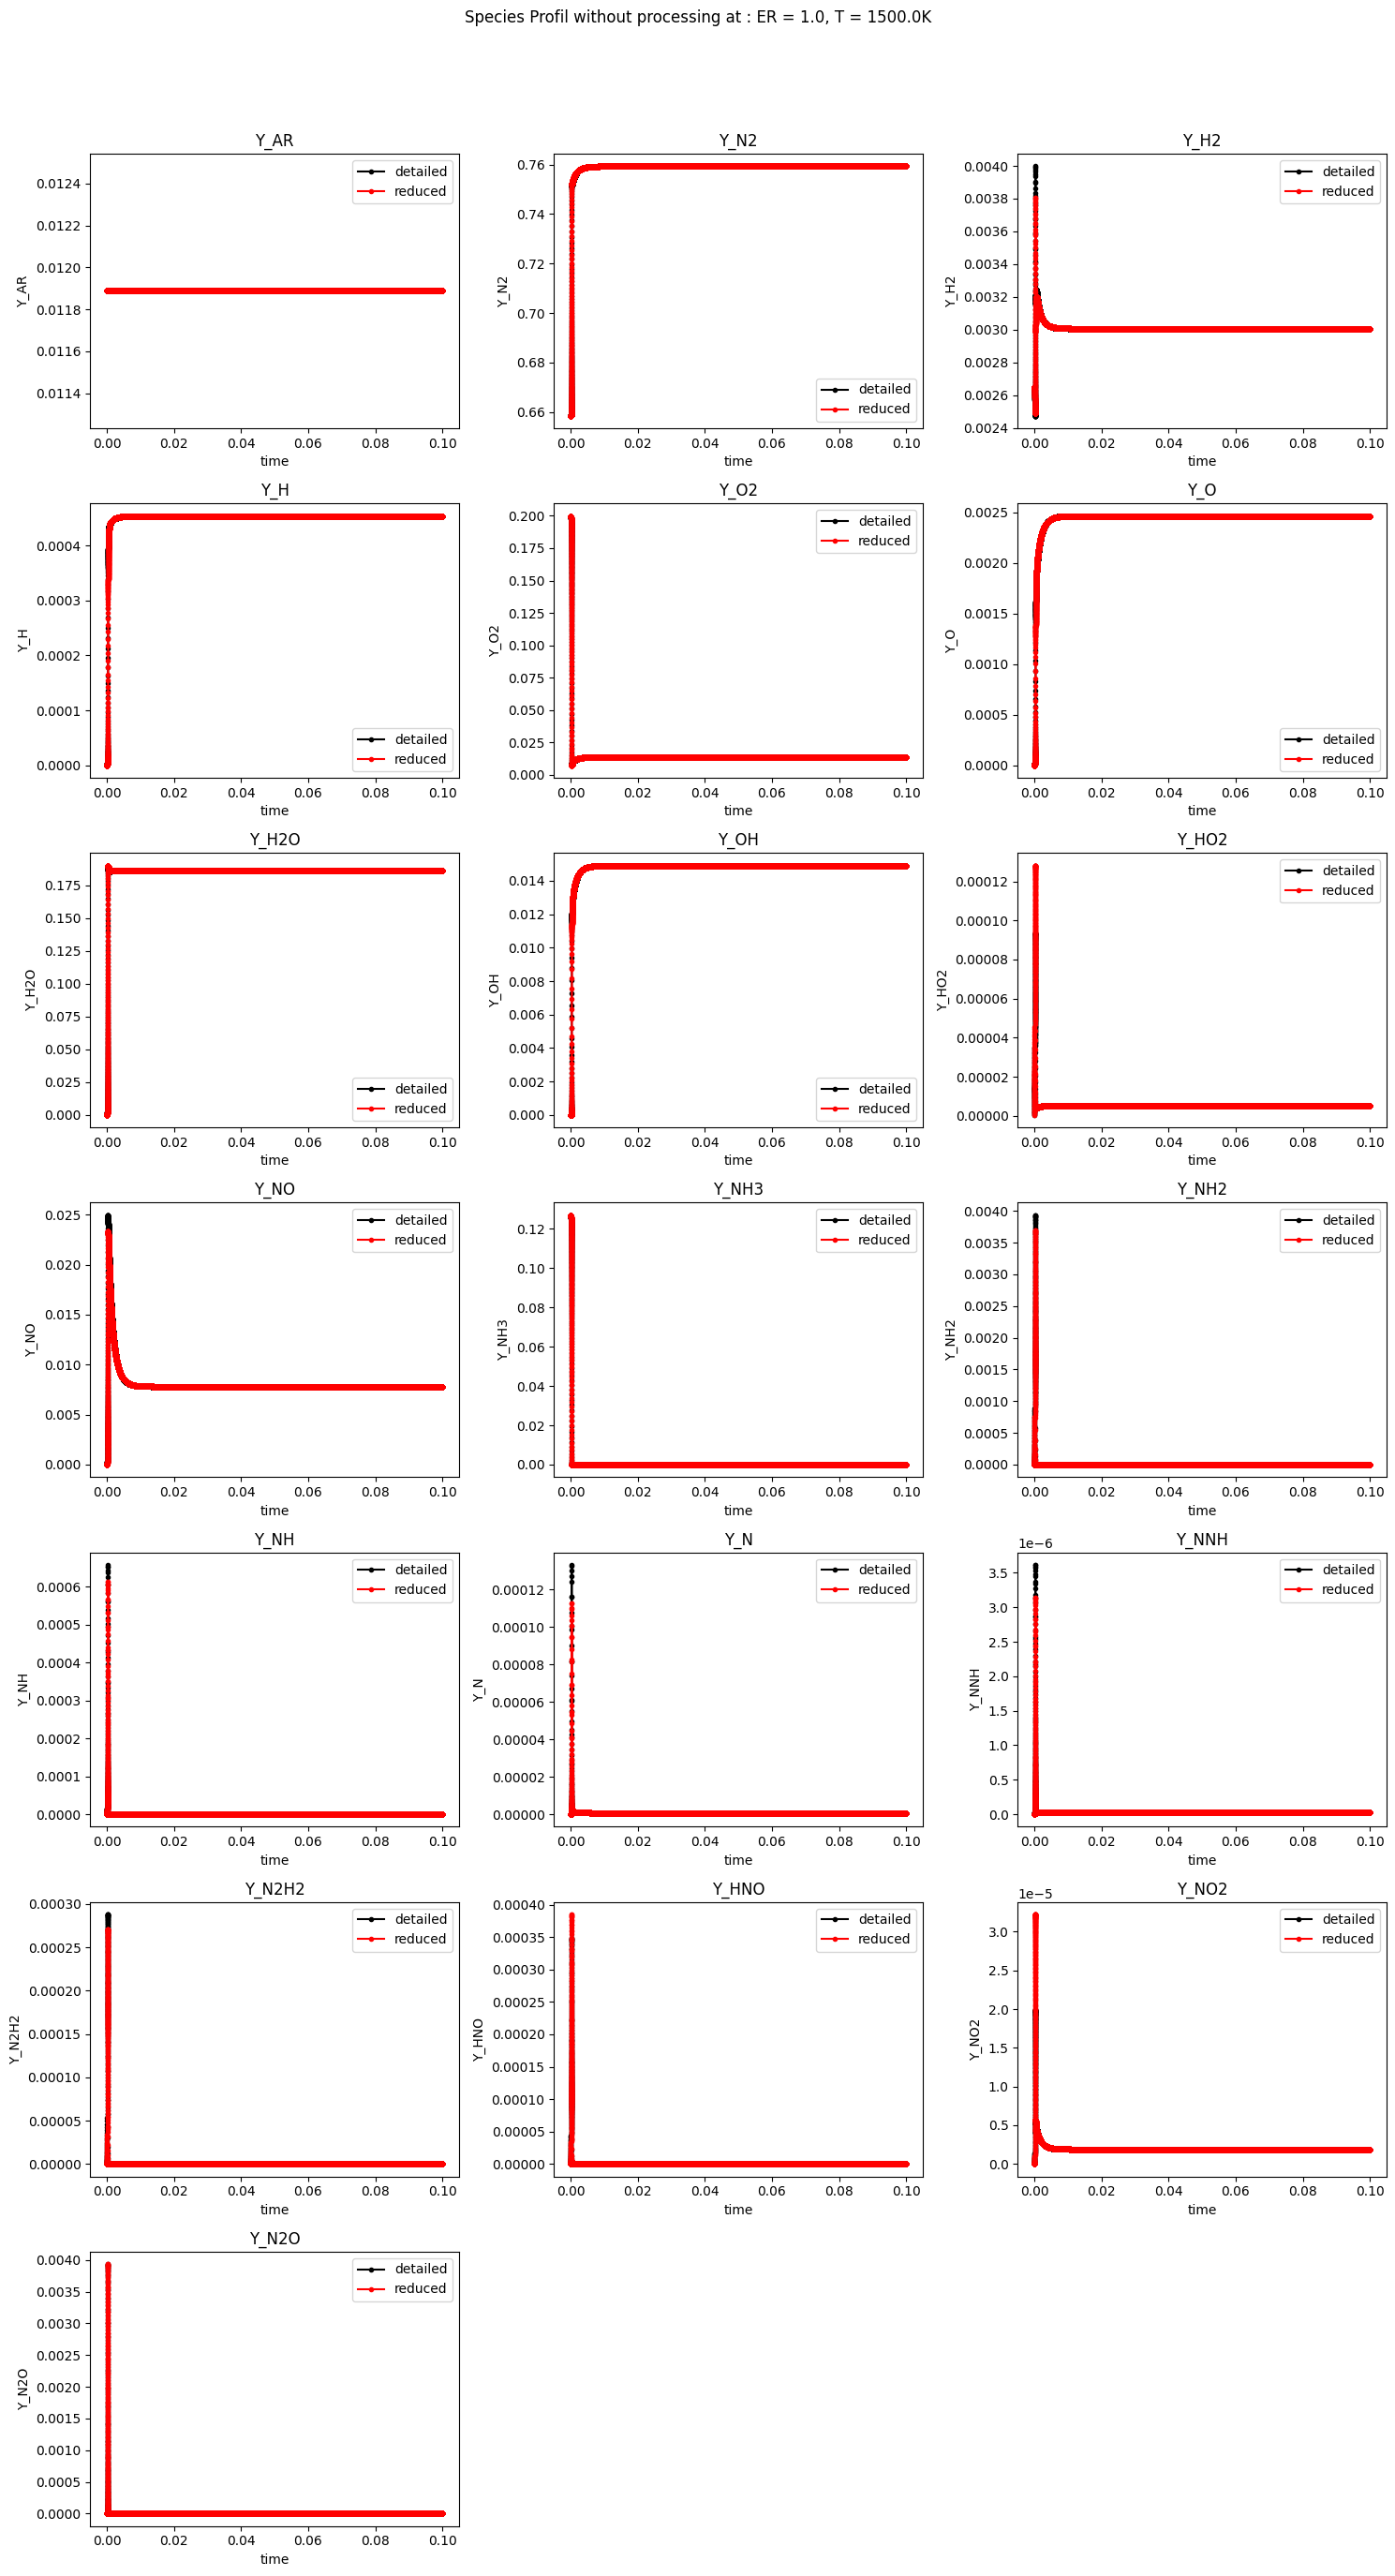

In [4]:
n_species = len(species)
n_cols = 3 # You can adjust number of columns depending on layout preference
n_rows = (n_species + n_cols - 1) // n_cols  # Ceiling division for rows

fig, axs = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), squeeze=False,constrained_layout=True)

for i, s in enumerate(species):
    row, col = divmod(i, n_cols)
    ax = axs[row][col]
    ax.plot(data_d0["t"], data_d0[s], 'k.-', label='detailed')
    ax.plot(data_r0["t"], data_r0[s], 'r.-', label='reduced')
    ax.set_xlabel("time")
    ax.set_ylabel(s)
    ax.legend()
    ax.set_title(s)

# Hide any unused subplots
for i in range(n_species, n_rows * n_cols):
    row, col = divmod(i, n_cols)
    fig.delaxes(axs[row][col])

fig.suptitle(f"Species Profil without processing at : ER = {ER}, T = {T}K")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("Species.png")



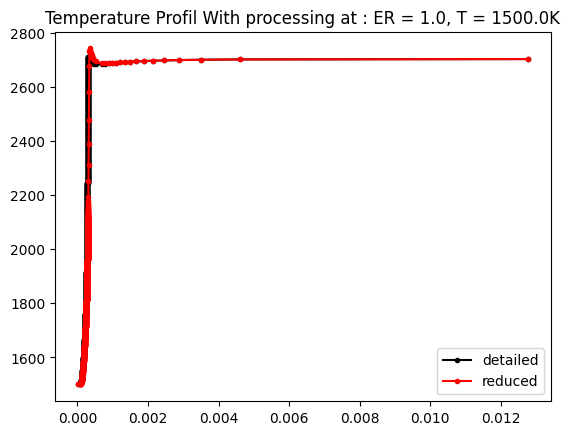

In [5]:
plt.plot(loc_data_d["common_grid"],loc_data_d["T"],'k.-', label='detailed')
plt.plot(loc_data_r["common_grid"],loc_data_r["T"],'r.-', label='reduced')
plt.title(f"Temperature Profil With processing at : ER = {ER}, T = {T}K")
plt.legend()
plt.savefig("temperature_processing.png")

/tmp/ipykernel_2205283/3180317273.py:22: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0, 1, 0.95])


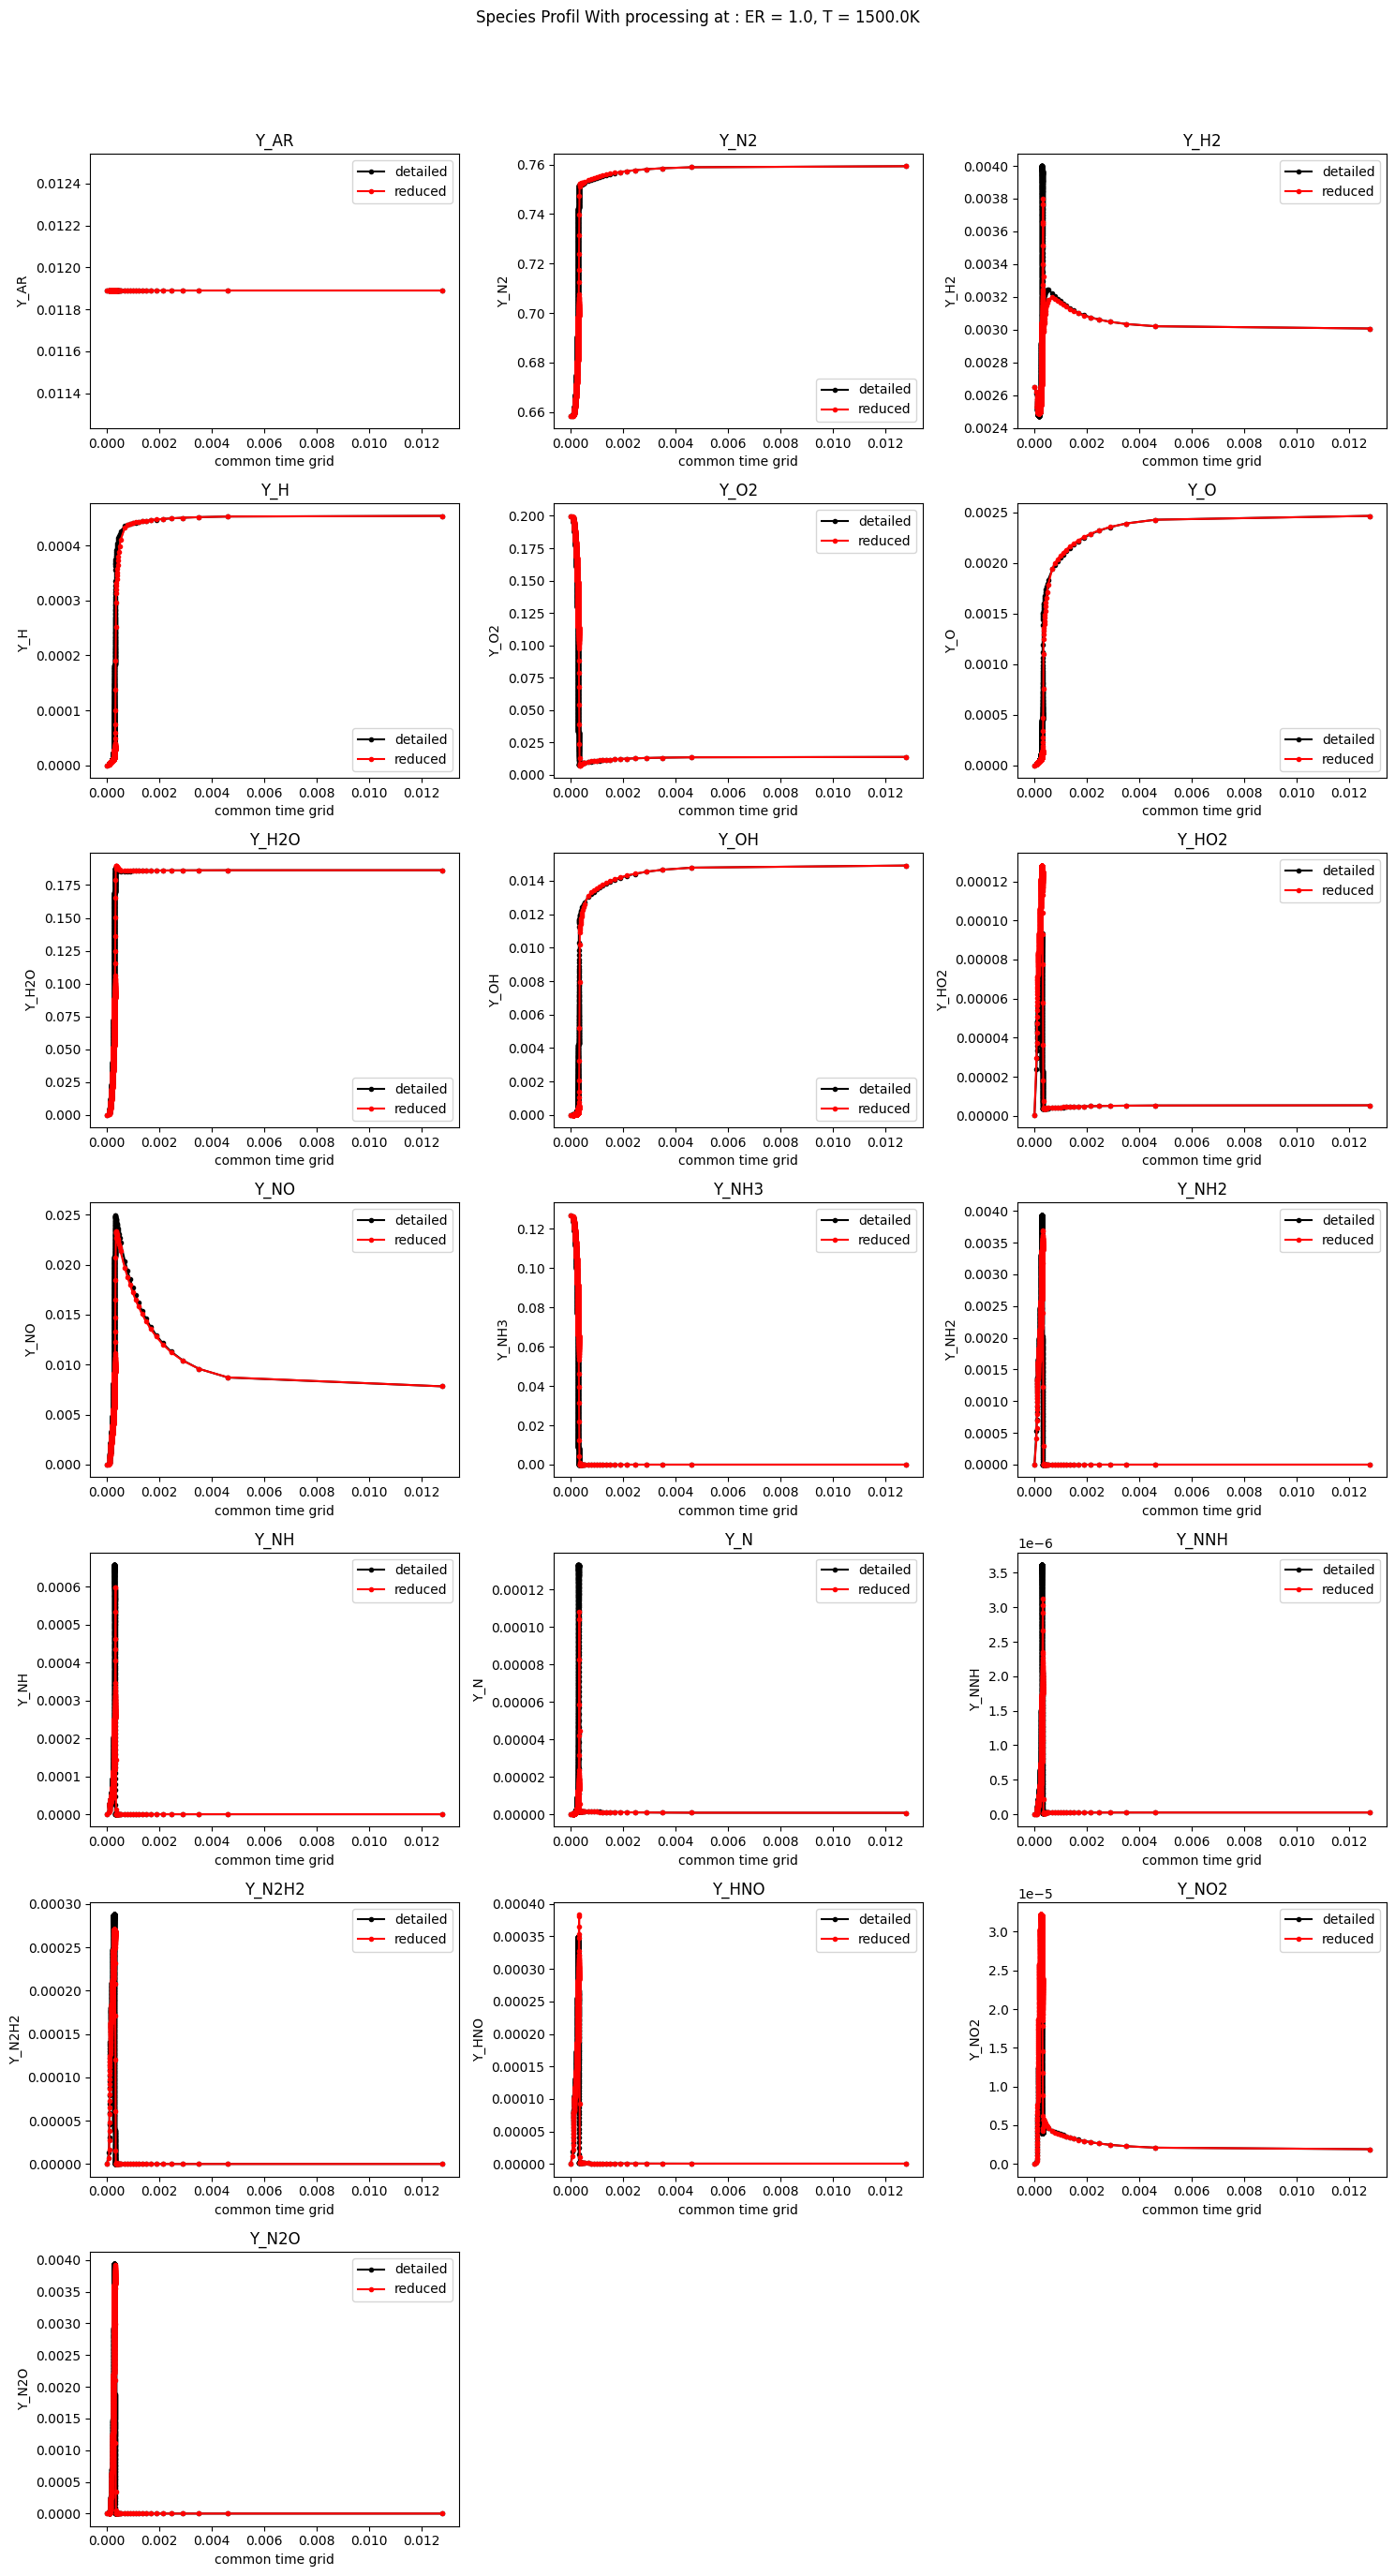

In [6]:
n_species = len(species)
n_cols = 3 # You can adjust number of columns depending on layout preference
n_rows = (n_species + n_cols - 1) // n_cols  # Ceiling division for rows

fig, axs = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), squeeze=False,constrained_layout=True)

for i, s in enumerate(species):
    row, col = divmod(i, n_cols)
    ax = axs[row][col]
    ax.plot(loc_data_d["common_grid"], loc_data_d[s], 'k.-', label='detailed')
    ax.plot(loc_data_r["common_grid"], loc_data_r[s], 'r.-', label='reduced')
    ax.set_xlabel("common time grid")
    ax.set_ylabel(s)
    ax.legend()
    ax.set_title(s)

# Hide any unused subplots
for i in range(n_species, n_rows * n_cols):
    row, col = divmod(i, n_cols)
    fig.delaxes(axs[row][col])
fig.suptitle(f"Species Profil With processing at : ER = {ER}, T = {T}K")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("Species_Processing.png")



In [7]:
print(len(data_d0))
print(len(data_r0))
print(len(data_d))
print(len(data_r))

100000
100000
25000
25000


In [8]:
print(data_d["common_grid"]==data_r["common_grid"])

0        True
1        True
2        True
3        True
4        True
         ... 
24995    True
24996    True
24997    True
24998    True
24999    True
Name: common_grid, Length: 25000, dtype: bool
